# Requirements

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
from tqdm import notebook
from skimage.transform import rescale, resize
from skimage import color
from skimage.io import imread, imsave

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import keras


# Dataset Preprocessing

In [14]:
train_raw_O_list = glob('./data/OX/O/*')
train_raw_O_list

['./data/OX/O\\10_HJ.jpg',
 './data/OX/O\\10_JT.jpg',
 './data/OX/O\\10_Taek.png',
 './data/OX/O\\1_HJ.jpg',
 './data/OX/O\\1_JT.jpg',
 './data/OX/O\\1_Taek.png',
 './data/OX/O\\2_HJ.jpg',
 './data/OX/O\\2_JT.jpg',
 './data/OX/O\\2_Taek.png',
 './data/OX/O\\3_HJ.jpg',
 './data/OX/O\\3_JT.jpg',
 './data/OX/O\\3_Taek.png',
 './data/OX/O\\4_HJ.jpg',
 './data/OX/O\\4_JT.jpg',
 './data/OX/O\\4_Taek.png',
 './data/OX/O\\5_HJ.jpg',
 './data/OX/O\\5_JT.jpg',
 './data/OX/O\\5_Taek.png',
 './data/OX/O\\6_HJ.jpg',
 './data/OX/O\\6_JT.jpg',
 './data/OX/O\\6_Taek.png',
 './data/OX/O\\7_HJ.jpg',
 './data/OX/O\\7_JT.jpg',
 './data/OX/O\\7_Taek.png',
 './data/OX/O\\8_HJ.jpg',
 './data/OX/O\\8_JT.jpg',
 './data/OX/O\\8_Taek.png',
 './data/OX/O\\9_HJ.jpg',
 './data/OX/O\\9_JT.jpg',
 './data/OX/O\\9_Taek.png',
 './data/OX/O\\O01_Sam.jpg',
 './data/OX/O\\O02_Sam.jpg',
 './data/OX/O\\O03_Sam.jpg',
 './data/OX/O\\O04_Sam.jpg',
 './data/OX/O\\O05_Sam.jpg',
 './data/OX/O\\O06_Sam.jpg',
 './data/OX/O\\O07_Sam.

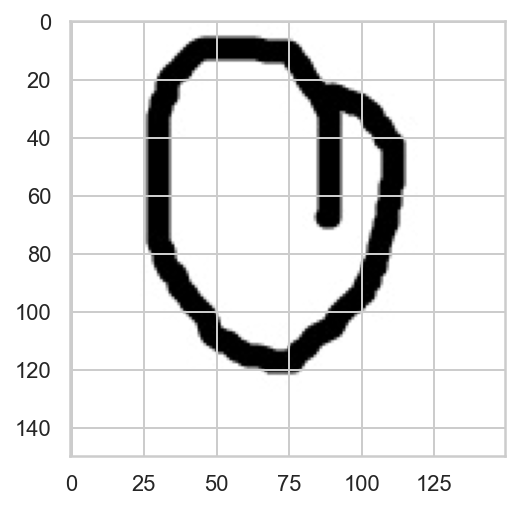

In [4]:
image = imread(train_raw_O_list[0])
image = color.rgb2gray(image)
plt.imshow(image, cmap='gray');

(28, 28)


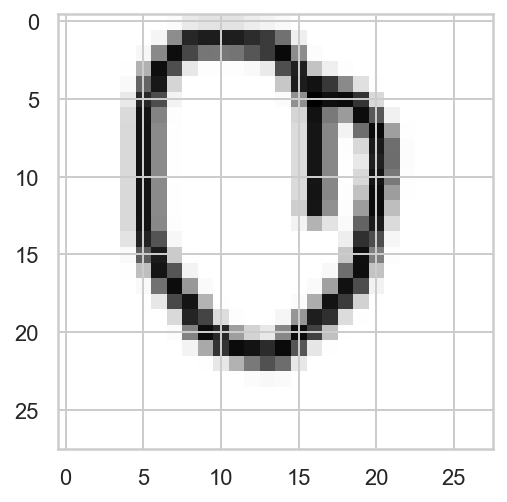

In [5]:
img_resized = resize(image, (28, 28))
print(img_resized.shape)
plt.imshow(img_resized, cmap='gray');

In [32]:
imsave('./tmp.png', np.round(img_resized*255).astype(np.uint8))

(28, 28)


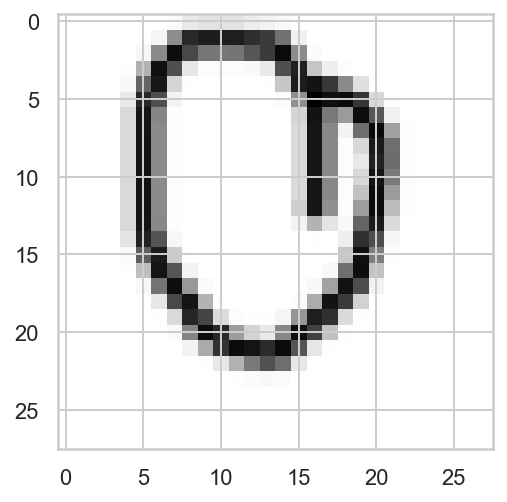

In [21]:
tmp = imread('./tmp.png')
print(tmp.shape)
plt.imshow(tmp, cmap='gray');

In [28]:
# 파일이름 추출

train_raw_O_list[0].split('\\')[-1][:-4]

'10_HJ'

In [6]:
# 이미지 resize 함수

def img_resize(img):
    img = color.rgb2gray(img)
    return resize(img, (28, 28))

In [29]:
# Train OX

def convert_train_OX():
    train_raw_O_list = glob('./data/OX/O/*')
    for each in notebook.tqdm(train_raw_O_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX/train/O/' + each.split('\\')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))

    train_raw_X_list = glob('./data/OX/X/*')
    for each in notebook.tqdm(train_raw_X_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX/train/X/' + each.split('\\')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))

In [33]:
convert_train_OX()

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [36]:
# Test OX Data

def convert_test_OX():
    test_raw_O_list = glob('./data/OX/test raw/O/*')
    for each in notebook.tqdm(test_raw_O_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX/test/O/' + each.split('\\')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))

    test_raw_X_list = glob('./data/OX/test raw/X/*')
    for each in notebook.tqdm(test_raw_X_list):
        img = imread(each)
        img_resized = img_resize(img)
        save_name = './data/OX/test/X/' + each.split('\\')[-1][:-4] + '.png'
        imsave(save_name, np.round(img_resized*255).astype(np.uint8))

convert_test_OX()

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [35]:
np.random.seed(13)

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('./data/OX/train', target_size=(28, 28), batch_size=3, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator =  test_datagen.flow_from_directory('./data/OX/test', target_size=(28, 28), batch_size=3, class_mode='categorical')

Found 80 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


# Modeling

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit

In [40]:
# ImageDataGenerator로 만든 데이터는 fit_generator로 학습해야함. (학습시간 30초)

hist = model.fit_generator(train_generator, steps_per_epoch=15, epochs=50, validation_data=test_generator, validation_steps=5)

C:\Users\samba\AppData\Local\Temp\ipykernel_27280\3864338542.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_generator, steps_per_epoch=15, epochs=50, validation_data=test_generator, validation_steps=5)


Epoch 1/50
15/15 [==============================] - 21s 281ms/step - loss: 1.0404 - accuracy: 0.4889 - val_loss: 0.6723 - val_accuracy: 0.8333
Epoch 2/50
15/15 [==============================] - 0s 20ms/step - loss: 0.6008 - accuracy: 0.6889
Epoch 3/50
15/15 [==============================] - 0s 18ms/step - loss: 0.3084 - accuracy: 0.9545
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.1721 - accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.1604 - accuracy: 0.9773
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0475 - accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0995 - accuracy: 0.9545
Epoch 8/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0836 - accuracy: 0.9778
Epoch 9/50
15/15 [==============================] - 0s 9ms/step - loss: 0.1027 - accuracy: 0.9333
Epoch 10/50
15/15 [==============================] - 0s 9ms/step - los

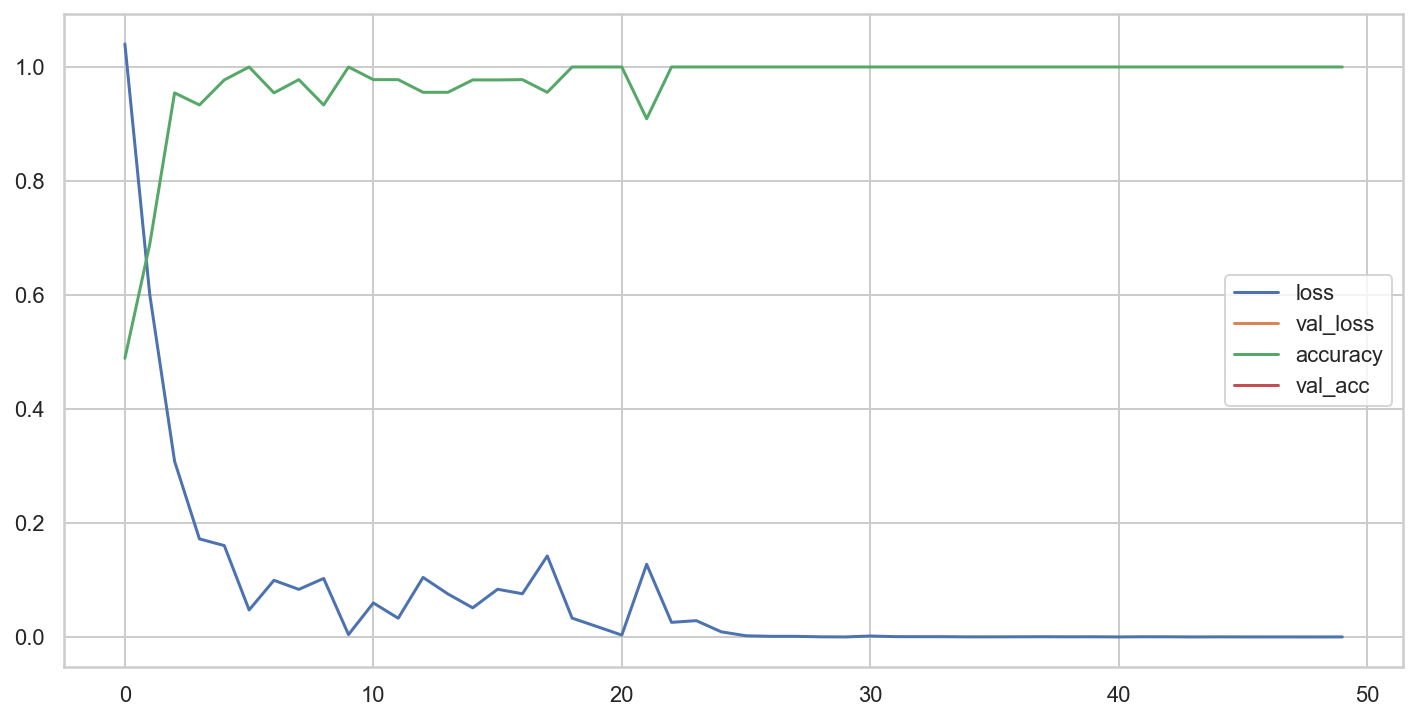

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# TEST

In [47]:
scores = model.evaluate(test_generator, steps=5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1] * 100))

5/5 [==============================] - 0s 24ms/step - loss: 0.1052 - accuracy: 0.9167
accuracy: 91.67%


In [48]:
model.predict(test_generator)

4/4 [==============================] - 0s 17ms/step


array([[9.9995399e-01, 4.5968474e-05],
       [6.6025008e-05, 9.9993396e-01],
       [1.2629504e-10, 1.0000000e+00],
       [9.9999809e-01, 1.8838773e-06],
       [1.0000000e+00, 5.8696674e-08],
       [9.9998820e-01, 1.1800884e-05],
       [7.1637791e-01, 2.8362209e-01],
       [2.4031652e-03, 9.9759680e-01],
       [9.9993122e-01, 6.8725240e-05],
       [8.4840593e-08, 9.9999988e-01],
       [5.0256845e-06, 9.9999499e-01],
       [9.9999917e-01, 8.7196258e-07]], dtype=float32)

In [54]:
def show_prediction_result(n):
    img = imread(test_generator.filepaths[n])
    pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
    title = 'Predict: ' + str(np.argmax(pred))
    plt.imshow(img/255., cmap='gray')
    plt.title(title)
    plt.show()

1/1 [==============================] - 0s 23ms/step


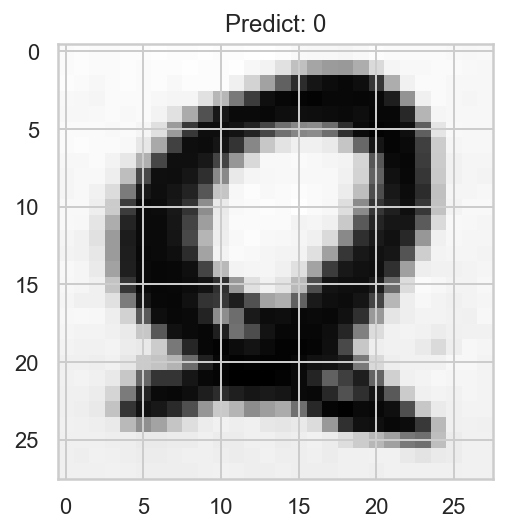

In [59]:
show_prediction_result(1)

# Result

1/1 [==============================] - 0s 29ms/step


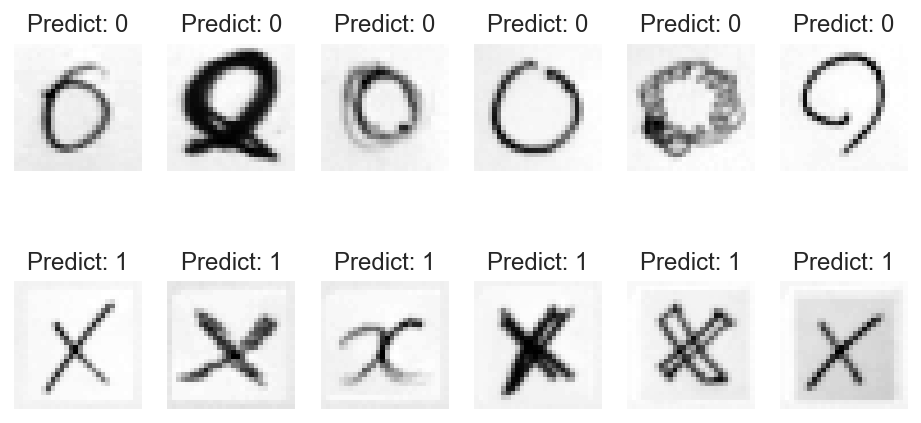

In [63]:
plt.figure(figsize=(8, 4))

for n in range(12):
    img = imread(test_generator.filepaths[n])
    pred = model.predict(np.expand_dims(color.gray2rgb(img), axis=0))
    title = 'Predict: ' + str(np.argmax(pred))

    plt.subplot(2, 6, n + 1)
    plt.imshow(img/255., cmap='gray')
    plt.title(title)
    plt.axis("off")
    
plt.show()